# **DUPLICATE QUESTION PAIR PROJECT**

---



---

##**INTRODUCTION**

The goal of this project is to predict which of the provided pairs of questions contain two questions with the same meaning.This will help many websites to use already replied answer for similar questions that are asked by the users.

#### **Project Overview**

In this project, different learning algorithms including Logistic regression, decision tree, XGBoost and random forest have been used to find the best algorithm for predicting whether given two questions are same or not.


#### **Dataset and features**

The dataset for this credit risk modelling project has been taken from kaggle.

Here is link :-https://www.kaggle.com/competitions/quora-question-pairs/data

####**Data Fields**
id - the id of a training set question pair

qid1, qid2 - unique ids of each question (only available in train.csv)

question1, question2 - the full text of each question

is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

**Importing Libraries**

In [4]:
#Importing libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
pip install distance

In [6]:
import csv

with open("train.csv", "r") as infile, open("cleaned_train.csv", "w", newline="") as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    for row in reader:
        if len(row) > 2:  # Assuming the issue is in column 3
            row[2] = row[2].replace(",", "\\,")  # Escape commas
        writer.writerow(row)

**Loading the dataset**

In [7]:
df=pd.read_csv("cleaned_train.csv")

In [8]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0


In [9]:
print('The shape of our data is:', df.shape)


The shape of our data is: (141487, 6)


## **DATA PREPROCESSING**

---



---

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141487 entries, 0 to 141486
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            141487 non-null  int64  
 1   qid1          141487 non-null  int64  
 2   qid2          141487 non-null  int64  
 3   question1     141487 non-null  object 
 4   question2     141486 non-null  object 
 5   is_duplicate  141486 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.5+ MB


In [11]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [12]:
df.describe()

,id,qid1,qid2,is_duplicate
count,141487.000000,141487.000000,141487.000000,141486.000000
mean,70743.000000,100636.675320,100835.232438,0.372461
std,40843.923106,65671.673946,65885.285131,0.483462
min,0.000000,1.000000,2.000000,0.000000
25%,35371.500000,42046.500000,41844.000000,0.000000
50%,70743.000000,94852.000000,95135.000000,0.000000
75%,106114.500000,156370.000000,157022.000000,1.000000
max,141486.000000,224599.000000,224601.000000,1.000000


In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(141485, 6)

In [15]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [16]:
# duplicate rows
df.duplicated().sum()

0

0.0    88787
1.0    52698
Name: is_duplicate, dtype: int64
0.0    62.753649
1.0    37.246351
Name: is_duplicate, dtype: float64


<Axes: >

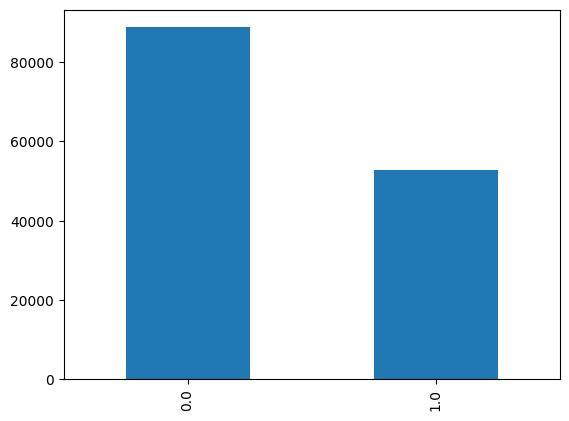

In [17]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [18]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 224598
Number of questions getting repeated 30668


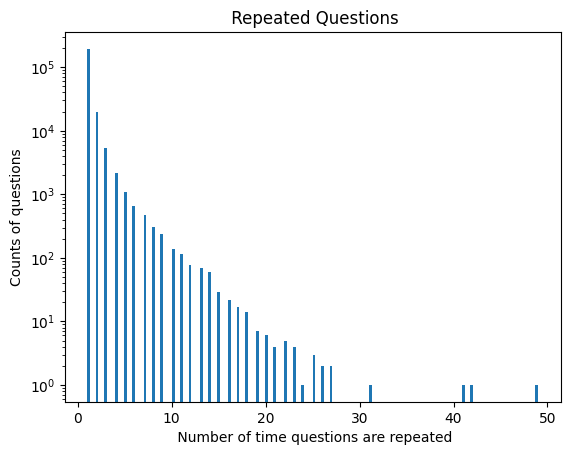

In [19]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.xlabel(" Number of time questions are repeated")
plt.ylabel("Counts of questions")
plt.title(" Repeated Questions")
plt.show()

In [20]:
#createing new dataframe that has 30000 rows of data
new_df = df.sample(30000,random_state=2)

In [21]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [22]:

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
1251,1251,2494,2495,How does Keyhole fetch hash tag data from Face...,Why are hash tags so important?,0.0
91221,91221,152913,40948,I want to write a book. What can I do?,I want to write a book? What should I do?,1.0
95146,95146,57913,158749,What are the safest websites to watch free mov...,Which are the websites where I can watch free ...,0.0
51450,51450,45052,18952,How to gain weight ?,How do I gain weight?,1.0
37424,37424,68106,68107,Does wearing glasses make your eyesight worse?,Can glasses make your eye sight worse?,1.0


In [23]:
#checking null values
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [24]:
new_df.duplicated().sum()

0

0.0    18872
1.0    11128
Name: is_duplicate, dtype: int64
0.0    62.906667
1.0    37.093333
Name: is_duplicate, dtype: float64


<Axes: >

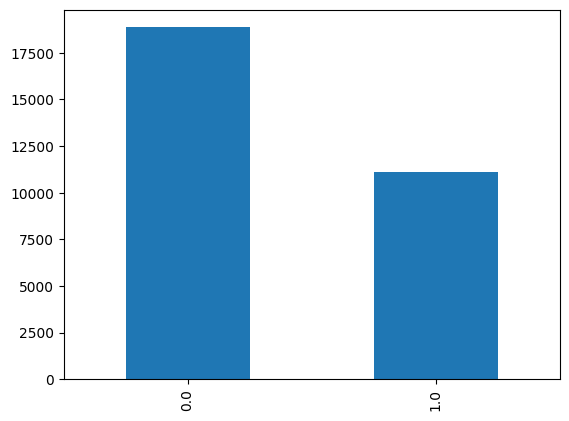

In [25]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [26]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55472
Number of questions getting repeated 3426


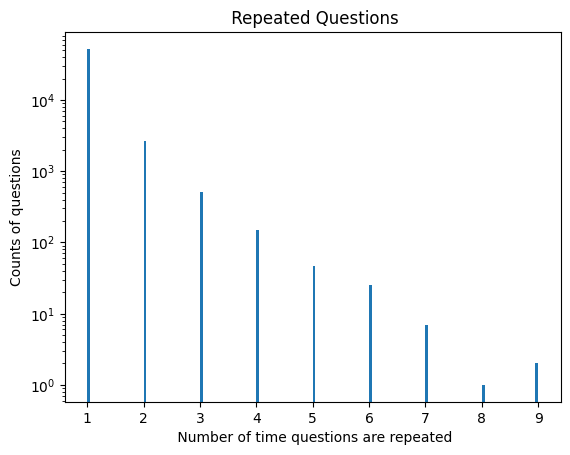

In [27]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.xlabel(" Number of time questions are repeated")
plt.ylabel("Counts of questions")
plt.title(" Repeated Questions")
plt.yscale('log')
plt.show()

###**Exploratory Data Analysis**

---

In [28]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [29]:
#example to show how the function works
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [30]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [31]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate
1251,1251,2494,2495,how does keyhole fetch hash tag data from face...,why are hash tags so important,0.0
91221,91221,152913,40948,i want to write a book what can i do,i want to write a book what should i do,1.0
95146,95146,57913,158749,what are the safest websites to watch free mov...,which are the websites where i can watch free ...,0.0
51450,51450,45052,18952,how to gain weight,how do i gain weight,1.0
37424,37424,68106,68107,does wearing glasses make your eyesight worse,can glasses make your eye sight worse,1.0


#****Creating new features****

---

In [32]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [33]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
1251,1251,2494,2495,how does keyhole fetch hash tag data from face...,why are hash tags so important,0.0,91,30,17,6
91221,91221,152913,40948,i want to write a book what can i do,i want to write a book what should i do,1.0,37,40,11,11
95146,95146,57913,158749,what are the safest websites to watch free mov...,which are the websites where i can watch free ...,0.0,52,70,10,13
51450,51450,45052,18952,how to gain weight,how do i gain weight,1.0,18,20,4,5
37424,37424,68106,68107,does wearing glasses make your eyesight worse,can glasses make your eye sight worse,1.0,45,37,7,7


In [34]:
#function that  will give common words present in both questions
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)


In [35]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
1251,1251,2494,2495,how does keyhole fetch hash tag data from face...,why are hash tags so important,0.0,91,30,17,6,1
91221,91221,152913,40948,i want to write a book what can i do,i want to write a book what should i do,1.0,37,40,11,11,9
95146,95146,57913,158749,what are the safest websites to watch free mov...,which are the websites where i can watch free ...,0.0,52,70,10,13,6
51450,51450,45052,18952,how to gain weight,how do i gain weight,1.0,18,20,4,5,3
37424,37424,68106,68107,does wearing glasses make your eyesight worse,can glasses make your eye sight worse,1.0,45,37,7,7,4


In [36]:
#function that will find sum of length of both questions
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [37]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
1251,1251,2494,2495,how does keyhole fetch hash tag data from face...,why are hash tags so important,0.0,91,30,17,6,1,23
91221,91221,152913,40948,i want to write a book what can i do,i want to write a book what should i do,1.0,37,40,11,11,9,20
95146,95146,57913,158749,what are the safest websites to watch free mov...,which are the websites where i can watch free ...,0.0,52,70,10,13,6,23
51450,51450,45052,18952,how to gain weight,how do i gain weight,1.0,18,20,4,5,3,9
37424,37424,68106,68107,does wearing glasses make your eyesight worse,can glasses make your eye sight worse,1.0,45,37,7,7,4,14


In [38]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
1251,1251,2494,2495,how does keyhole fetch hash tag data from face...,why are hash tags so important,0.0,91,30,17,6,1,23,0.04
91221,91221,152913,40948,i want to write a book what can i do,i want to write a book what should i do,1.0,37,40,11,11,9,20,0.45
95146,95146,57913,158749,what are the safest websites to watch free mov...,which are the websites where i can watch free ...,0.0,52,70,10,13,6,23,0.26
51450,51450,45052,18952,how to gain weight,how do i gain weight,1.0,18,20,4,5,3,9,0.33
37424,37424,68106,68107,does wearing glasses make your eyesight worse,can glasses make your eye sight worse,1.0,45,37,7,7,4,14,0.29


In [39]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")
     # for 8 features we make list of 0 elements
    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [40]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [41]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
1251,1251,2494,2495,how does keyhole fetch hash tag data from face...,why are hash tags so important,0.0,91,30,17,6,...,23,0.04,0.333322,0.124998,0.000000,0.000000,0.166664,0.058823,0,0
91221,91221,152913,40948,i want to write a book what can i do,i want to write a book what should i do,1.0,37,40,11,11,...,20,0.45,0.999967,0.999967,0.833319,0.833319,0.799992,0.799992,1,1
95146,95146,57913,158749,what are the safest websites to watch free mov...,which are the websites where i can watch free ...,0.0,52,70,10,13,...,23,0.26,0.799984,0.666656,0.399992,0.285710,0.599994,0.461535,0,0
51450,51450,45052,18952,how to gain weight,how do i gain weight,1.0,18,20,4,5,...,9,0.33,0.999950,0.999950,0.499975,0.333322,0.749981,0.599988,1,1
37424,37424,68106,68107,does wearing glasses make your eyesight worse,can glasses make your eye sight worse,1.0,45,37,7,7,...,14,0.29,0.599988,0.599988,0.499975,0.499975,0.571420,0.571420,1,0


In [42]:
import distance
#function to add length features
def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [43]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [44]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
1251,1251,2494,2495,how does keyhole fetch hash tag data from face...,why are hash tags so important,0.0,91,30,17,6,...,0.124998,0.000000,0.000000,0.166664,0.058823,0,0,11,11.5,0.290323
91221,91221,152913,40948,i want to write a book what can i do,i want to write a book what should i do,1.0,37,40,11,11,...,0.999967,0.833319,0.833319,0.799992,0.799992,1,1,0,10.0,0.763158
95146,95146,57913,158749,what are the safest websites to watch free mov...,which are the websites where i can watch free ...,0.0,52,70,10,13,...,0.666656,0.399992,0.285710,0.599994,0.461535,0,0,3,11.5,0.226415
51450,51450,45052,18952,how to gain weight,how do i gain weight,1.0,18,20,4,5,...,0.999950,0.499975,0.333322,0.749981,0.599988,1,1,1,4.5,0.631579
37424,37424,68106,68107,does wearing glasses make your eyesight worse,can glasses make your eye sight worse,1.0,45,37,7,7,...,0.599988,0.499975,0.499975,0.571420,0.571420,1,0,0,7.0,0.578947


In [45]:
print(new_df.shape)


(30000, 24)


#****Plotting new features****

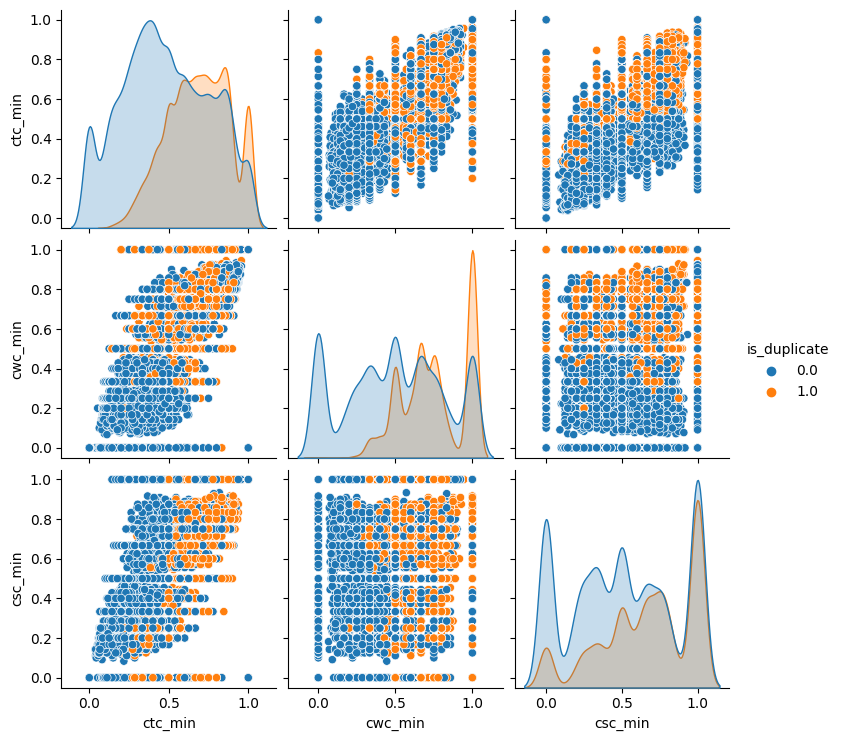

In [46]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

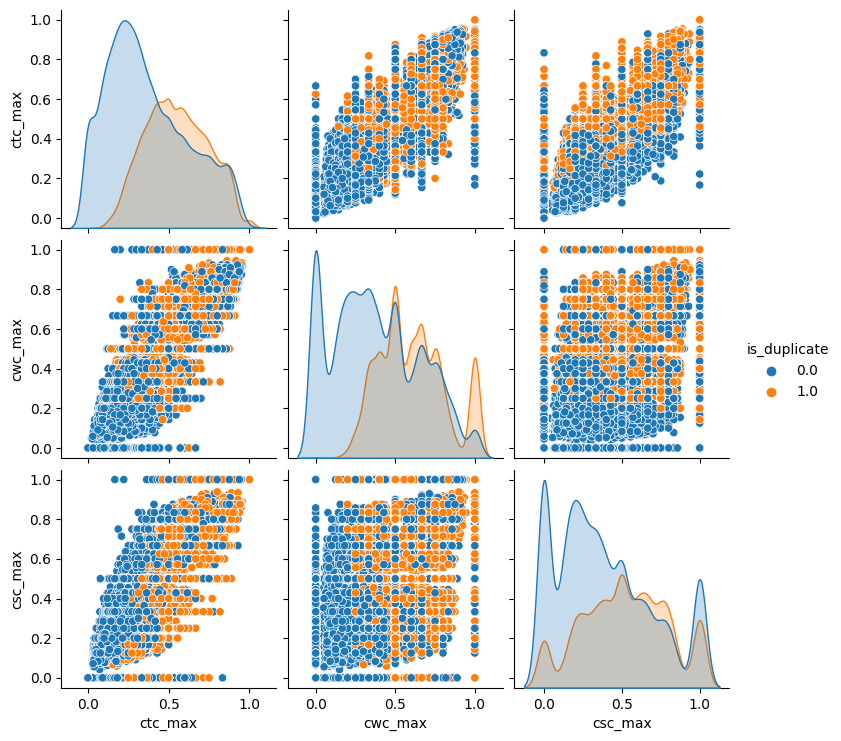

In [47]:

sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

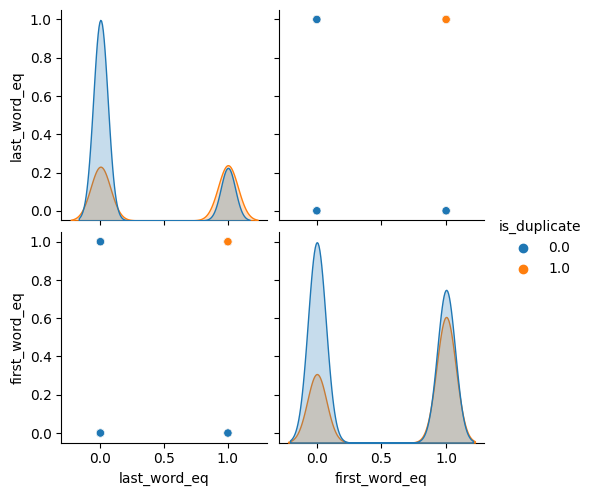

In [48]:

sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

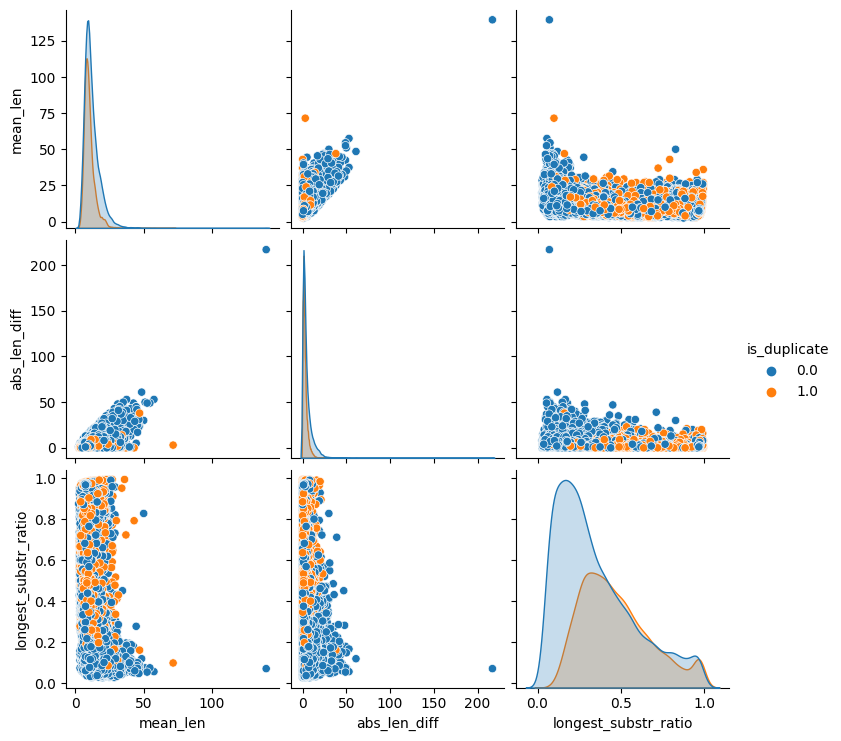

In [49]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

## **Scaling the Data**

---



---


In [50]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' ,  'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [51]:
# Calculate the correlation matrix
correlation_matrix = new_df.corr()

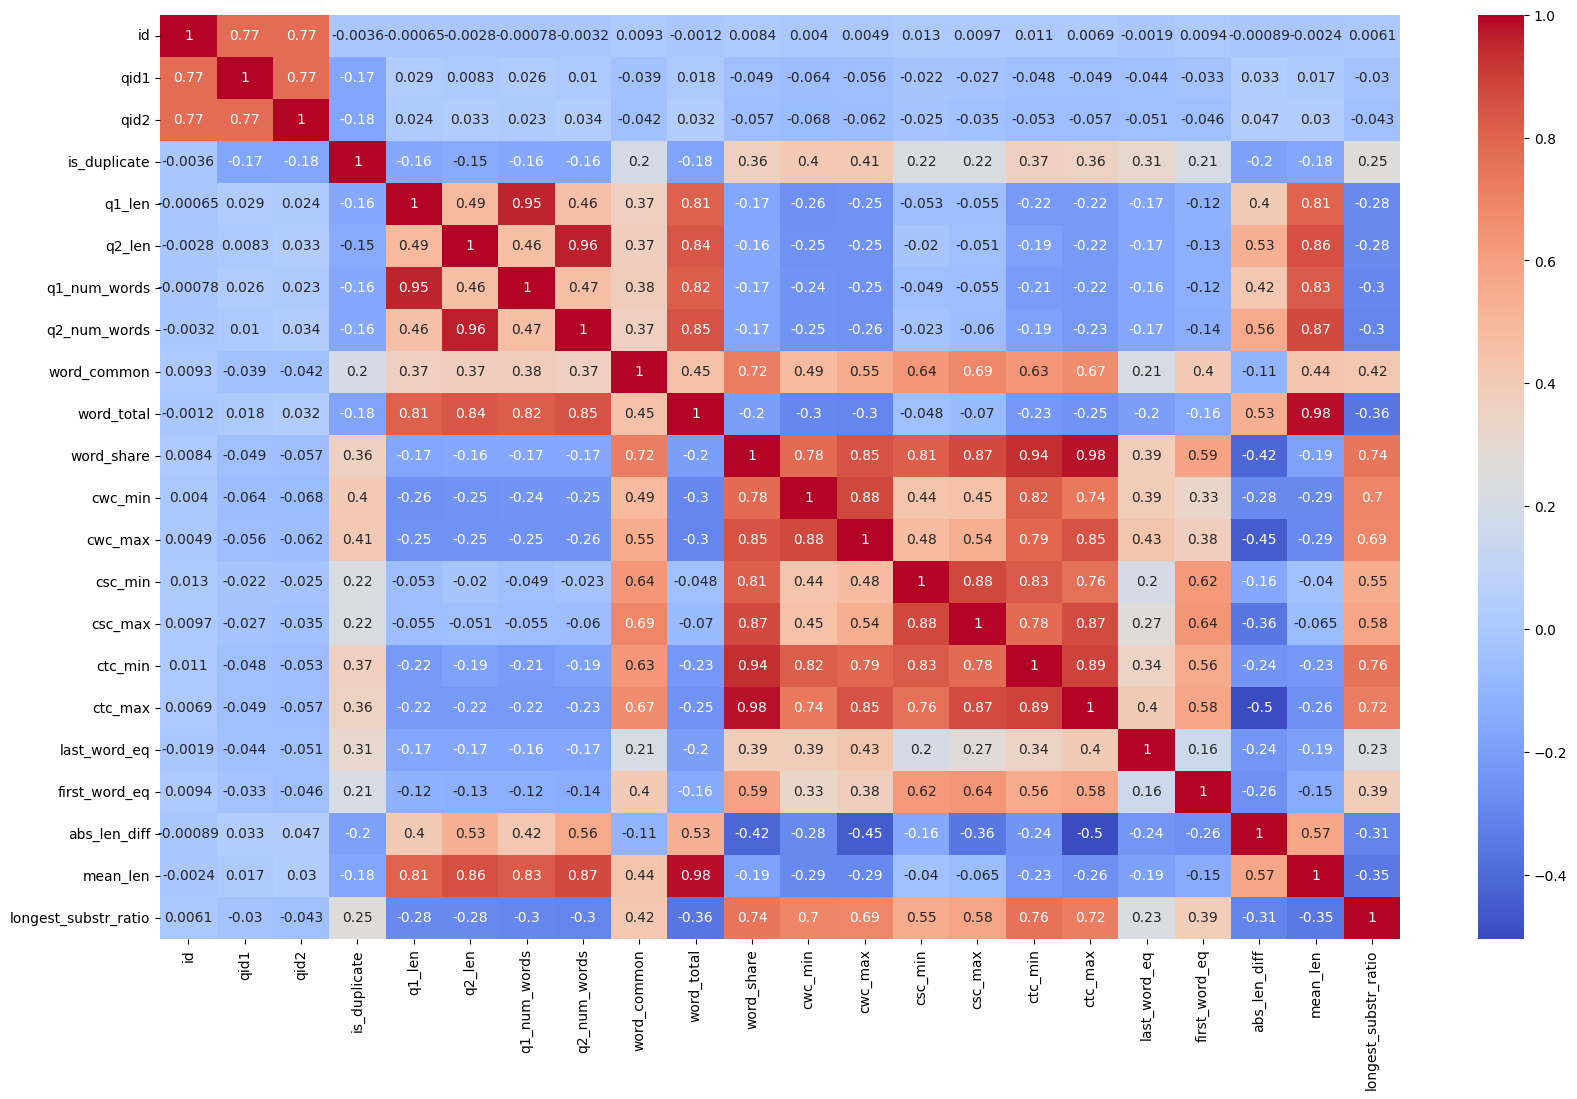

In [52]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

##**Feature selection**

In [53]:
# Convert the dataset into a pandas DataFrame
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Calculate point-biserial correlation between each feature and the target
correlation_matrix = df.corr()
target_correlation = correlation_matrix['target'].abs().sort_values(ascending=False)

# Select features with correlation above a threshold (e.g., 0.2)
correlation_threshold = 0.2
selected_features = target_correlation[target_correlation > correlation_threshold].index

print(f"Selected Features: {selected_features}")


Selected Features: Index(['target', 'feature_1', 'feature_0', 'feature_4', 'feature_5',
       'feature_6', 'feature_10', 'feature_2', 'feature_3', 'feature_7'],
      dtype='object')


In [54]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
1251,how does keyhole fetch hash tag data from face...,why are hash tags so important
91221,i want to write a book what can i do,i want to write a book what should i do
95146,what are the safest websites to watch free mov...,which are the websites where i can watch free ...
51450,how to gain weight,how do i gain weight
37424,does wearing glasses make your eyesight worse,can glasses make your eye sight worse


In [55]:
final_df = new_df[['is_duplicate','cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' ,  'longest_substr_ratio']]
print(final_df.shape)
final_df.head()

(30000, 11)


,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,longest_substr_ratio
1251,0.0,0.333322,0.124998,0.000000,0.000000,0.166664,0.058823,0,0,11,0.290323
91221,1.0,0.999967,0.999967,0.833319,0.833319,0.799992,0.799992,1,1,0,0.763158
95146,0.0,0.799984,0.666656,0.399992,0.285710,0.599994,0.461535,0,0,3,0.226415
51450,1.0,0.999950,0.999950,0.499975,0.333322,0.749981,0.599988,1,1,1,0.631579
37424,1.0,0.599988,0.599988,0.499975,0.499975,0.571420,0.571420,1,0,0,0.578947


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [57]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [58]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6011)


,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
1251,0.0,0.333322,0.124998,0.000000,0.000000,0.166664,0.058823,0,0,11,...,0,0,0,0,0,0,0,0,0,0
91221,1.0,0.999967,0.999967,0.833319,0.833319,0.799992,0.799992,1,1,0,...,0,0,0,0,0,0,0,0,0,0
95146,0.0,0.799984,0.666656,0.399992,0.285710,0.599994,0.461535,0,0,3,...,0,0,0,0,0,0,0,0,0,0
51450,1.0,0.999950,0.999950,0.499975,0.333322,0.749981,0.599988,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37424,1.0,0.599988,0.599988,0.499975,0.499975,0.571420,0.571420,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### **Splitting the training and testing data**

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.33,random_state=2)

In [60]:
print('The shape of our training data is:', X_train.shape)

The shape of our training data is: (20100, 6010)


In [61]:
print('The shape of our test data is:', X_test.shape)

The shape of our test data is: (9900, 6010)


##**Training the data**

We focused on four kinds of algorithms: XGBoost, Random-Forest, Logistic Regression and  Decision Trees  to predict duplicate question pair. We then evaluated our models' performances using Confusion Matrix.

# **1. Random Forest Classifier**

It is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and Bootstrap Aggregation.

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model
rf.fit(X_train,y_train)
# Make predictions
rf_y_pred = rf.predict(X_test)
# Calculate accuracy
accuracy=accuracy_score(y_test,rf_y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.7856565656565656


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

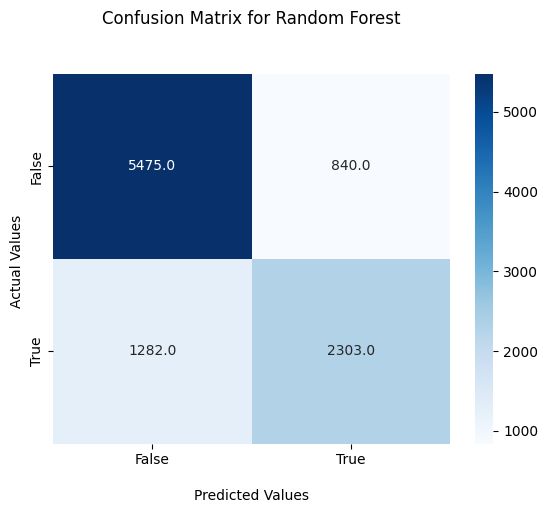

In [63]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, rf_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


# **2. XGBoost Classifier**

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library.

 It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [64]:
from xgboost import XGBClassifier
# Initialize the XGBoost classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)
# Fit the model
xgb.fit(X_train,y_train)
# Make predictions
xgb_y_pred = xgb.predict(X_test)
# Calculate accuracy
accuracy=accuracy_score(y_test,xgb_y_pred)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.7858585858585858


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

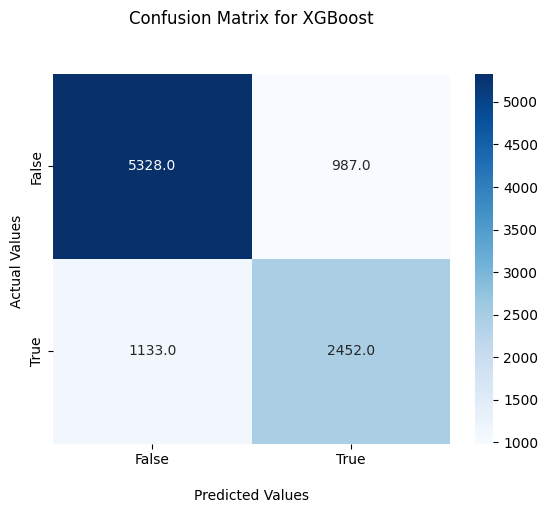

In [65]:
cf_matrix = confusion_matrix(y_test, xgb_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for XGBoost\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# **3. Decision Tree**

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.

In [66]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
# Fit the model
clf.fit(X_train, y_train)
# Make predictions
dc_y_pred= clf.predict(X_test)
# Calculate accuracy
accuracy=accuracy_score(y_test,dc_y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.7241414141414141


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

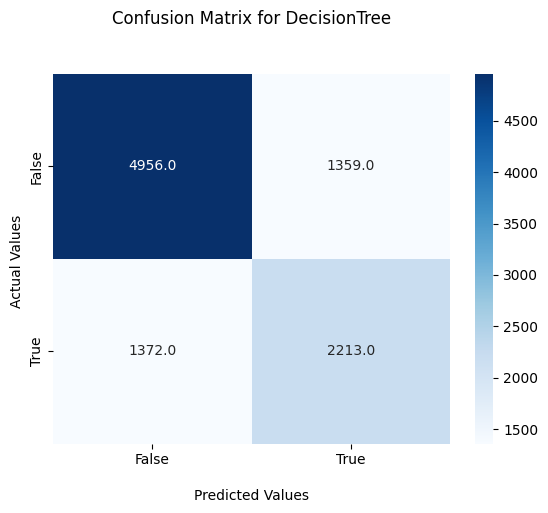

In [67]:
cf_matrix = confusion_matrix(y_test, dc_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for DecisionTree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# **4. Logistic Regression**

Logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression classifier
classifier = LogisticRegression(random_state=42)
# Fit the model
classifier.fit(X_train,y_train)
# Make predictions
lr_y_pred = classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy:", accuracy)






Logistic Regression Accuracy: 0.7647474747474747


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

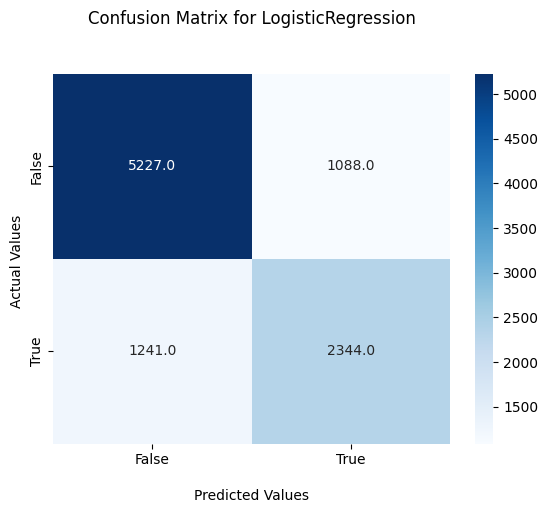

In [69]:
cf_matrix = confusion_matrix(y_test, lr_y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f",cmap='Blues')

ax.set_title('Confusion Matrix for LogisticRegression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# **Conclusion:**

---



---

After fitting and testing the different models on the data, Random Forest Classifier performed better than all other algorithms that we used and were able to predict the question duplicacy on our test set.

In [70]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [71]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [72]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [73]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*2

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))


    strs = list(distance.lcsubstrings(q1, q2))
    length_features[1] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [74]:
def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)


    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()



    return np.hstack((np.array(input_query).reshape(1,10),q1_bow,q2_bow))

In [75]:
cv

CountVectorizer(max_features=3000)

In [76]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))